In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston(return_X_y=False)

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['MEDV'] = df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## CHECKING NULL VALUES

In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values in our data

### <b>So we proceed further to check correlation between different variables</b>

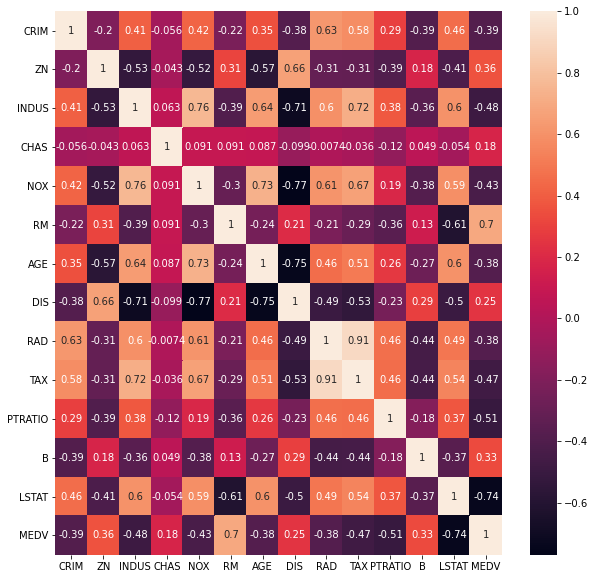

In [9]:
correlation_matrix = boston.corr()

import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)  # annot = True to print the values inside the square

###<b>Let's try to see the variation in price with respect to each of the variables</b>

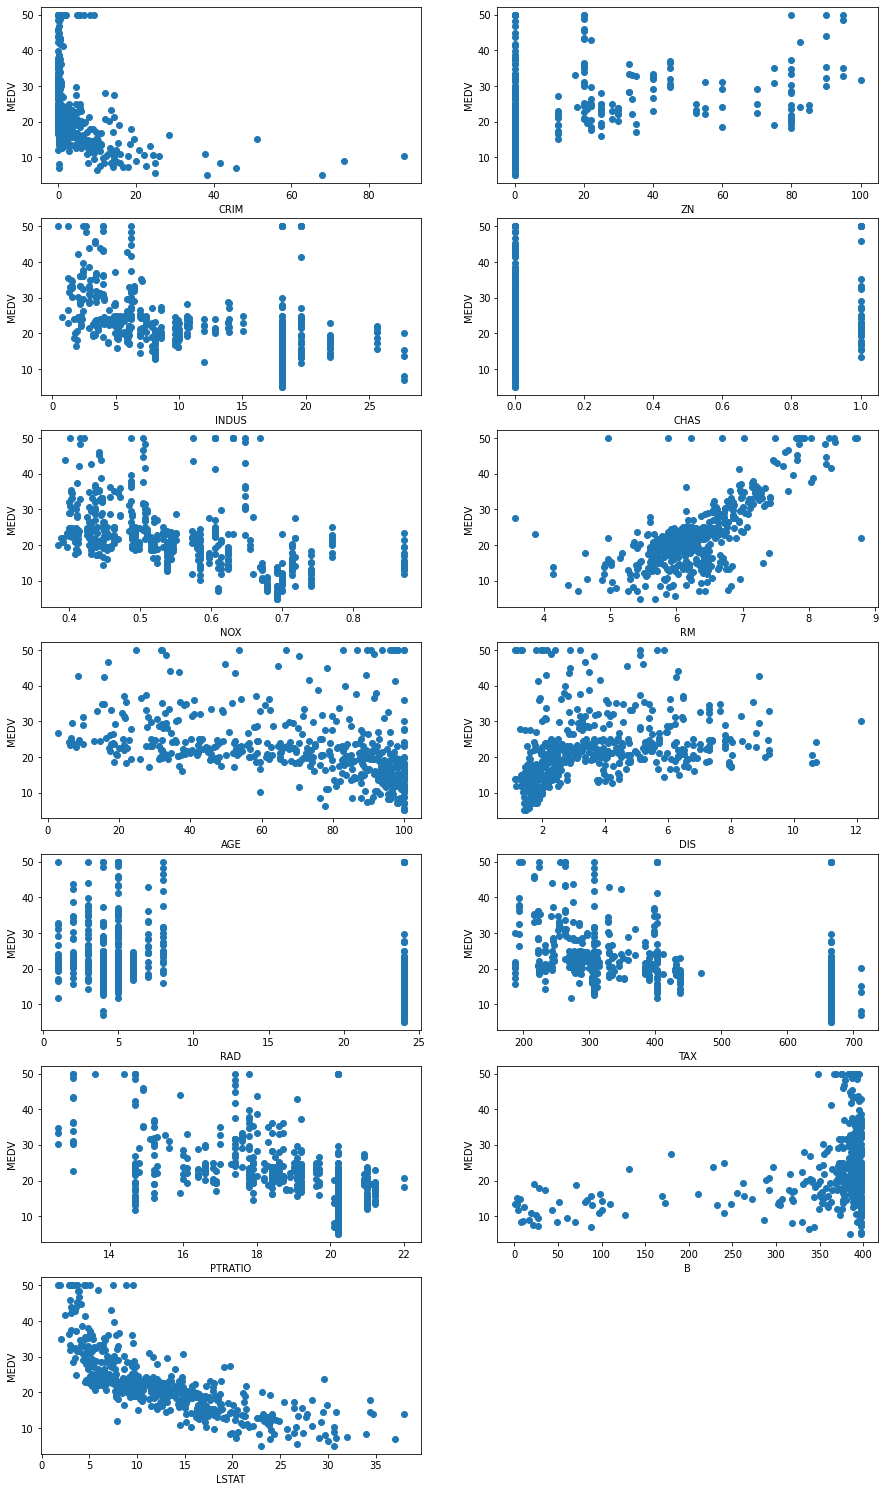

In [10]:
plt.figure(figsize=(15, 50))
features = df.feature_names
target = df.target
for i, col in enumerate(features):
    plt.subplot(len(features),2 , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.xlabel(col)
    plt.ylabel('MEDV')

## OBSERVATIONS


*   Variables <b>LSTAT</b> and <b>RM</b> have a hi correlation with the price of the house.
*   <b>INDUS-TAX,  INDUS-DIS, INDUS-NOX, DIS-NOX , AGE-NOX</b>, all these pairs have high correlation between them.



> First try to predict the house price using only the variables that have high linear correlation with the price.

In [11]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 2)
(76, 2)
(430,)
(76,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# on testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 5.596970449422867


The model performance for testing set
RMSE is 5.178451251951528


Text(0, 0.5, 'Predicted')

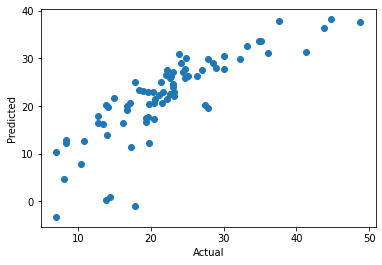

In [15]:
plt.scatter(Y_test, y_test_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')

> Now let's try to fit the linear regression model using all the variables

In [19]:
X = boston.drop('MEDV', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=5)
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# on testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 4.710901797319795


The model performance for testing set
RMSE is 4.687543527902971


Text(0, 0.5, 'Predicted')

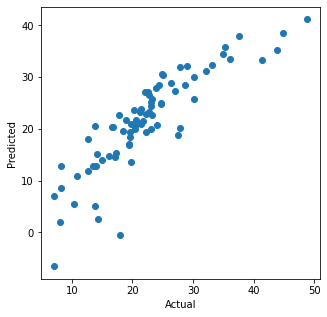

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test, y_test_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')

> <b>Now let's try to fit the data with the variables that dont have a high linear correlation with the price. Because they don't have a high linear correlation, so try to fit a higher degree equation.</b>

In [ ]:
X = boston.drop(['LSTAT','RM'], axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV
0,0.00632,18.0,2.31,0.0,0.538,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,0.02731,0.0,7.07,0.0,0.469,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,0.02729,0.0,7.07,0.0,0.469,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,0.03237,0.0,2.18,0.0,0.458,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,0.06905,0.0,2.18,0.0,0.458,54.2,6.0622,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,69.1,2.4786,1.0,273.0,21.0,391.99,22.4
502,0.04527,0.0,11.93,0.0,0.573,76.7,2.2875,1.0,273.0,21.0,396.90,20.6
503,0.06076,0.0,11.93,0.0,0.573,91.0,2.1675,1.0,273.0,21.0,396.90,23.9
504,0.10959,0.0,11.93,0.0,0.573,89.3,2.3889,1.0,273.0,21.0,393.45,22.0


In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
x_poly = poly.fit_transform(X.drop('MEDV', axis=1))

In [28]:
arr = [[0,1,2],[1,2,3]]
arr = np.asarray(arr)
arr

array([[0, 1, 2],
       [1, 2, 3]])

In [30]:
pol = PolynomialFeatures(degree=2, include_bias=False)
arr_poly = pol.fit_transform(arr)
arr_poly

array([[0., 1., 2., 0., 0., 0., 1., 2., 4.],
       [1., 2., 3., 1., 2., 3., 4., 6., 9.]])

In [31]:
pol = PolynomialFeatures(degree=2, include_bias=True) #BIAS TRUE MEANS INCLUDE 0 DEGREE VALUES
arr_poly = pol.fit_transform(arr)
arr_poly

array([[1., 0., 1., 2., 0., 0., 0., 1., 2., 4.],
       [1., 1., 2., 3., 1., 2., 3., 4., 6., 9.]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_poly, Y, test_size = 0.15, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 4368)
(76, 4368)
(430,)
(76,)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

# on testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
--------------------------------------
RMSE is 2.581585570129032e-05


The model performance for testing set
--------------------------------------
RMSE is 83953.37962126978


Text(0, 0.5, 'Predicted')

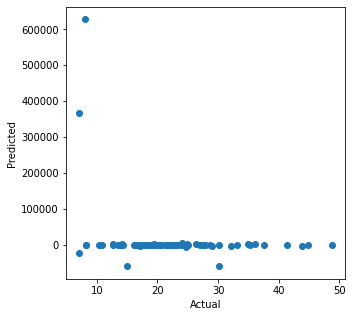

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test, y_test_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

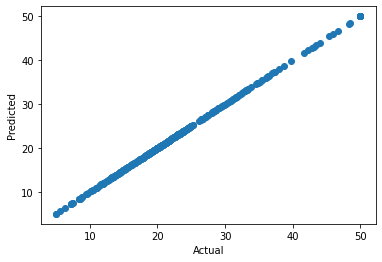

In [ ]:
plt.scatter(Y_train, lin_model.predict(X_train))
plt.xlabel('Actual')
plt.ylabel('Predicted')